<img style="width:450px;" src="https://durhamcollege.ca/wp-content/uploads/ai-hub-header.jpg" alt="DC Logo"/>

# LESSON 9 - Practical Regression

## <span style="color: green">OVERVIEW</span>

<hr />

>**Section 1:** <a href="#Linear-Regression">Linear Regression</a>

>**Section 2:** <a href="#Logistic-Regression">Logistic Regression</a>

>**Section 3:** <a href="#Polynomial-Regression">Polynomial Regression</a>

<hr />

This lesson takes the content from lessons 6 through 8 and guides you through a practical application of Linear, Logistic, and Polynomial Regression.

## <span style="color: green">SECTION 1</span>

### <span style="color: blue">Linear Regression</span>

**Lets take a look at some data, ask some questions and use linear regression to solve said questions.**

In [173]:
# imports
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame and verify contents
data = pd.read_csv('./goog.csv')
data.head(3)

,Date,Open,High,Low,Close,Volume
0,26-Feb-16,708.58,713.43,700.86,705.07,2239978
1,25-Feb-16,700.01,705.98,690.58,705.75,1631855
2,24-Feb-16,688.92,700.00,680.78,699.56,1958611


<hr />

**Now that we have our dataset, lets split the dates and prices into their own frames.**

In [174]:
# create a dataframe for the dates
# select the days only from the Date column using a for loop
dates = [int(i.split('-')[0]) for i in np.array(data)[:,0]]

# create a dataframe for the open prices
# select the data in the Open column
prices = np.array(data)[:,1]

# create a dataframe for the high prices
# select the data from the High column
high = np.array(data)[:,2]

prices = np.array([prices]).T
dates = np.array([dates]).T
#high = np.array([high]).T
#prices = np.hstack((price, high))

#print(dates)
print(prices)
#print(high)

[[708.58]
 [700.01]
 [688.92]
 [701.45]
 [707.45]
 [695.03]
 [710.0]
 [699.0]
 [692.98]
 [690.26]
 [675.0]
 [686.86]
 [672.32]
 [667.85]
 [703.87]
 [722.81]
 [770.22]
 [784.5]
 [750.46]]


<hr />

**With our price and date data split, we can now create functions to simplify the process.**

**The first function will be for predicting the price of a stock on day 'x'.**

In [175]:
# define a function for predicting the price
# given the dates and prices in a dataframe 
# and a day value represented as x
def predict_price(dates, prices, x):
    # initialize the linear regression model
    linear_mod = linear_model.LinearRegression()
    # fit the data to the model
    linear_mod.fit(dates, prices)
    # store the result of linear prediction at value x
    predicted_price = linear_mod.predict(x)
    # return the predicted price, linear coefficient, and the intercept
    return predicted_price, linear_mod.coef_, linear_mod.intercept_

<hr />

**Next, in order to properly show the variation in our methods, let's create a function for plotting our data points.**

**The second function will be for displaying a visualized plot of our data and prediction.**

In [176]:
def show_plot(dates, prices):
    linear_mod = linear_model.LinearRegression()
    linear_mod.fit(dates, prices)
    plt.scatter(dates, prices, color='lime')
    plt.plot(dates, linear_mod.predict(dates), color='blue', linewidth=3)
    plt.show()
    return

<hr />

**With our functions in place let's test them!**

In [177]:
# display the result of the predict_prices function
# pass the function the dates, prices, and an x value
predict_price(dates, prices, 39)

(array([[ 664.37196832]]), array([[-1.65535515]]), array([ 728.93081909]))

<hr />

**Now let's view our plot using the function we created above.**

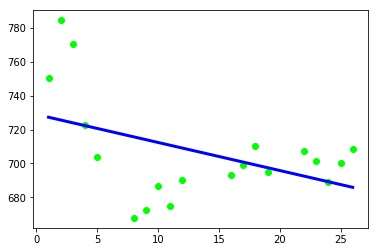

In [178]:
show_plot(dates, prices)

## <span style="color: green">SECTION 2</span>

### <span style="color: blue">Logistic Regression</span>

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets

In [180]:
# import some data to play with
iris = datasets.load_iris()
df = pd.DataFrame(np.c_[iris.data, iris.target], columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])

<hr />

In [181]:
# we select only the first two features.
data = np.c_[iris.data[:, :2], iris.target]
np.random.shuffle(data)

test_training_split = 0.7

<hr />

In [206]:
X = data[:, :2]
y = data[:, 2:]

<hr />

In [183]:
X_training = X[:int(X.shape[0]*test_training_split),:]
y_training = y[:int(y.shape[0]*test_training_split)]

<hr />

In [184]:
X_testing = X[int(X.shape[0]*test_training_split):,:]
y_testing = y[int(y.shape[0]*test_training_split):]

## Classes:
- Iris Setosa 
- Iris Versicolour 
- Iris Virginica

## We should now take a look at our data to make sure everything looks okay

In [185]:
#print(y_testing)
#print(y_testing.ravel())
#print(y_testing.shape)

## Initializing our logistic regression function imported from sklearn

In [186]:
# Initialize the test data using the LogisticRegression function
logreg = linear_model.LogisticRegression()

<hr />

In [187]:
# We use the initialized function to then fit the data.
logreg.fit(X_training, y_training.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<hr />

In [188]:
# With the training data fit, we can now run prediction on the test data
# using the predict function
Z = logreg.predict(X_testing)

<hr />

In [189]:
def classification_rate(y, Z):
    num_right = 0
    for i in range(len(Z)):
        if y[i] == Z[i]:
            num_right = num_right + 1
    return num_right/Z.shape[0]

<hr />

In [190]:
classification_rate(y_testing.ravel(), Z)

0.6888888888888889

# Well this isn't that great now is it?
## What comes next?

Let's begin implementing k-fold cross validation training and see what our output is

In [191]:
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression

In [192]:
Z_cross_validation = model_selection.cross_val_predict(LogisticRegression(), X, y.ravel(), cv=10)

print(model_selection.cross_val_score(LogisticRegression(), X, y.ravel()))

[ 0.7254902   0.70588235  0.72916667]


<hr />

In [193]:
classification_rate(y.ravel(), Z_cross_validation)

0.76

<hr />

# This is not that much better...
#### There are many different classification algorithms sklearn has available to utilize in a similar way to what was demonstrated above. 

The following will be touched on in future lessons:
1. SVM
2. Naive Bayes
3. Decision Trees
4. Random Forests
5. Neural Networks

## <span style="color: green">SECTION 3</span>

### <span style="color: blue">Polynomial Regression</span>

#### With the variety of classification available, it is important to understand the origin of many of these advanced regression analysis techniques - polynomial regression.

In [194]:
import numpy as np
# from scipy.interpolate import *
import matplotlib.pyplot as plt

%matplotlib inline

### We're going to take a look at some synthetic data for this one
Hopefully this will help visualize what's going on a bit better

In [195]:
# Create a couple arrays with 
X = np.array([0,1,2,3,4,5])
y = np.array([0,0.8,0.9,0.1,-0.8,-1])

# print to observe
print(X)
print(y)

[0 1 2 3 4 5]
[ 0.   0.8  0.9  0.1 -0.8 -1. ]


<hr />

Let's begin fitting our data. The polyfit method uses the sum of square errors to compute the line of best fit. In this first piece of code, we're going to stick with a straight line

In [196]:
# The last parameters is a 1 for now as we'll do linear to begin with
p1 = np.polyfit(X, y, 1)

<hr />

In [197]:
# This prints the slope and intercept
print(p1)

[-0.30285714  0.75714286]


<hr />

array([ 0.75714286,  0.45428571,  0.15142857, -0.15142857, -0.45428571,
       -0.75714286])

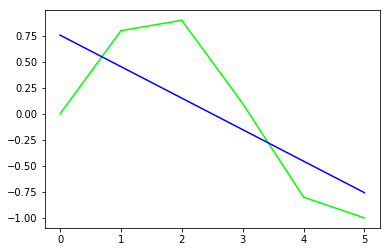

In [198]:
# polyval just helps plot the data with respect to the slope, intercept, and data. 
# r- is just for red line
plt.plot(X, y, color='lime')
plt.plot(X, np.polyval(p1, X), color='blue')
np.polyval(p1, X)

<hr />
### Now we'll move on to quadratric and cubes functions

In [199]:
p2 = np.polyfit(X, y, 2)
p3 = np.polyfit(X, y, 3)

<hr />

In [200]:
p1 # y = Ax + b

array([-0.30285714,  0.75714286])

<hr />

In [201]:
p2 # y = Ax^2 + Bx + C

array([-0.16071429,  0.50071429,  0.22142857])

<hr />

In [202]:
p3 # y = Ax^3 + Bx^2 + Cx + D

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

<hr />

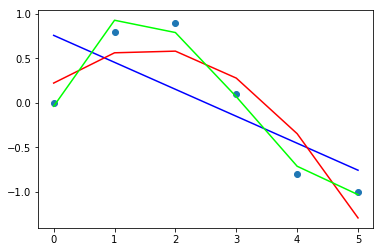

In [203]:
plt.plot(X,y,'o')

xp = X
#xp = np.linspace(-2,6,100)

plt.plot(xp, np.polyval(p1,xp), color='blue')
plt.plot(xp, np.polyval(p2,xp), color='red')
plt.plot(xp, np.polyval(p3,xp), color='lime')

<hr />

<b>Display the polynomial values for each defined point.</b>

In [204]:
np.polyval(p1,xp)

array([ 0.75714286,  0.45428571,  0.15142857, -0.15142857, -0.45428571,
       -0.75714286])